In [5]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt

from mpl_toolkits.basemap import Basemap as Basemap

m = Basemap(
        projection='merc',
        llcrnrlon=-90,
        llcrnrlat=5,
        urcrnrlon=-60,
        urcrnrlat=25,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)


%matplotlib inline

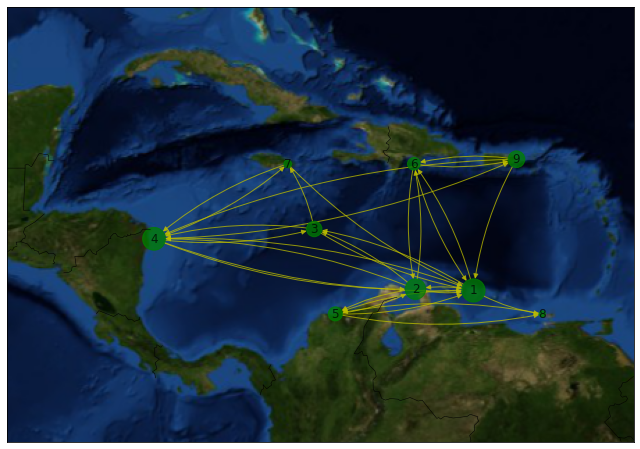

In [6]:
G = nx.DiGraph()
G.add_edge(1, 2, weight=14)
G.add_edge(1, 3, weight=2)
G.add_edge(1, 4, weight=2)
G.add_edge(1, 5, weight=4)
G.add_edge(1, 6, weight=4)
G.add_edge(1, 8, weight=1)
G.add_edge(2, 1, weight=4)
G.add_edge(2, 3, weight=8)
G.add_edge(2, 4, weight=2)
G.add_edge(2, 5, weight=4)
G.add_edge(2, 6, weight=3)
G.add_edge(3, 1, weight=2)
G.add_edge(3, 4, weight=9)
G.add_edge(3, 7, weight=1)
G.add_edge(4, 1, weight=8)
G.add_edge(4, 2, weight=2)
G.add_edge(4, 3, weight=2)
G.add_edge(4, 7, weight=2)
G.add_edge(4, 9, weight=12)
G.add_edge(5, 1, weight=4)
G.add_edge(5, 2, weight=4)
G.add_edge(5, 8, weight=2)
G.add_edge(6, 1, weight=5)
G.add_edge(6, 2, weight=1)
G.add_edge(6, 9, weight=2)
G.add_edge(7, 1, weight=1)
G.add_edge(7, 4, weight=2)
G.add_edge(8, 5, weight=2)
G.add_edge(9, 1, weight=2)
G.add_edge(9, 4, weight=11)
G.add_edge(9, 6, weight=1)
G.add_node(1, weight=27, loc = "Kralendijk")
G.add_node(2, weight=21, loc = "Aruba")
G.add_node(3, weight=12, loc = "Carribean Sea")
G.add_node(4, weight=26, loc = "East Nicaragua")
G.add_node(5, weight=10, loc = "Santa Marta")
G.add_node(6, weight=8, loc = "Santo Domingo")
G.add_node(7, weight=3, loc = "Jamaica")
G.add_node(8, weight=2, loc = "Isle de Margarita")
G.add_node(9, weight=14, loc = "Puerto Rico")

# The Carribean

pos={}
pos[1]=m(-67.668864,12.162359) # East of Curacao (Kralendijk)
pos[2]=m(-70.448604,12.222182) # North Aruba
pos[3]=m(-75.296125,15.024057) # Carribean Sea
pos[4]=m(-82.970083,14.567726) # East Nicaragua
pos[5]=m(-74.286615,11.064685) # Northern Columbia (Santa Marta)
pos[6]=m(-70.526640,18.016697) # Dominican Republic (Santo Domingo)
pos[7]=m(-76.567509,18.009788) # East Jamaica
pos[8]=m(-64.373907,11.060126) # East Isle de Margarita (West of Trinidad and Tobago)
pos[9]=m(-65.610550,18.223654) # East Puerto Rico

nsize = list(nx.get_node_attributes(G,'weight').values())
n_array = np.array(nsize)
n = n_array * 20
n1size = 20*nsize

fig, ax = plt.subplots(figsize=(15, 8))
nx.draw_networkx(G,pos,node_size=n,node_color='green', alpha = 0.75, edge_color = 'y',connectionstyle='arc3, rad = 0.1')

# Now draw the map
m.drawcountries()
m.bluemarble()
plt.show()                                                                            # show me the network!

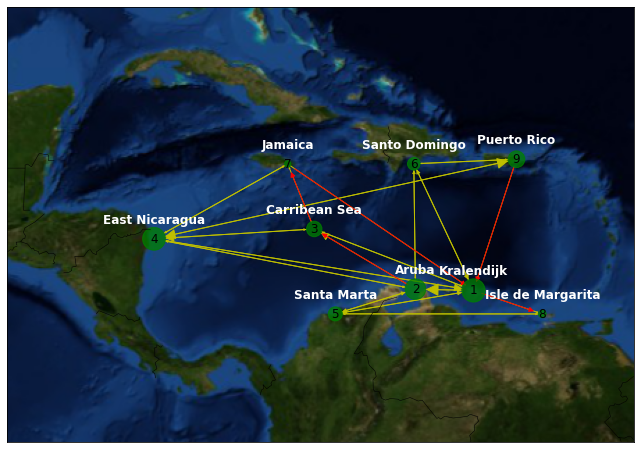

In [91]:
fig = plt.subplots(figsize=(15, 8))
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_nodes(G, pos, node_size=[540,420,240,520,200,160,60,40,280],node_color = 'g', alpha = 0.75)
nx.draw_networkx_labels(G, pos)
for edge in G.edges(data=True):
    w = edge[2]['weight']
    nx.draw_networkx_edges(G, pos, edgelist=[(edge[0],edge[1])], arrowsize=2*w,edge_color = 'y',node_size=[540,420,240,520,200,160,60,40,280])
nx.draw_networkx_edges(G, pos, edgelist=straight_edges, edge_color='red')
pos_attrs = {}
for node in pos:
    pos_attrs[node] = (pos[node][0], pos[node][1] + 100000)
node_attrs = nx.get_node_attributes(G, 'loc')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] =  attr 

nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_color = 'white', font_weight = 'bold')

# Now draw the map
m.drawcountries()
m.bluemarble()

plt.savefig('mapPlotWithColors.png')
plt.show()

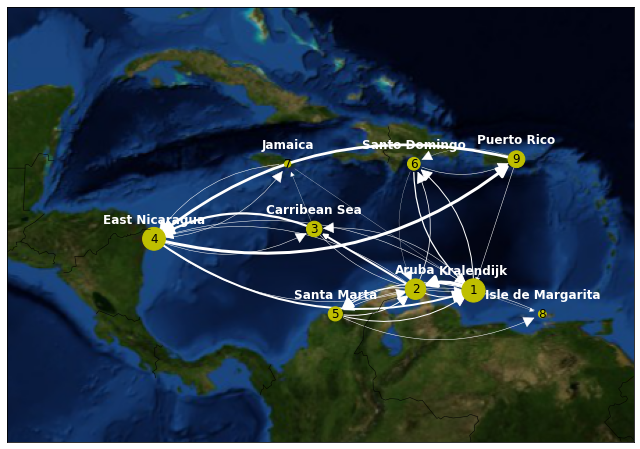

In [106]:
edge_weights = nx.get_edge_attributes(G,'weight')
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
curve_weights = list(curved_edge_labels.values())
straight_weights = list(straight_edge_labels.values())

c_array = np.array(curve_weights)
c = c_array / 4

s_array = np.array(straight_weights)
s = s_array / 4


fig, ax = plt.subplots(figsize=(15, 8))
nx.draw_networkx_nodes(G, pos, node_size=[540,420,240,520,200,160,60,40,280],node_color = 'y', ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)
curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
edge_weights = nx.get_edge_attributes(G,'weight')
curved_edge_labels = {edge: edge_weights[edge] for edge in curved_edges}
straight_edge_labels = {edge: edge_weights[edge] for edge in straight_edges}
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges, width = s, edge_color='white')
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, arrowsize = 25, connectionstyle=f'arc3, rad = {arc_rad}', edge_color='white', width = c)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_color = 'white', font_weight = 'bold')
m.drawcountries()
m.bluemarble()
plt.savefig('mapPlotWithArrowsWeight.png')
plt.show()

In [77]:
pos[1][0]

2483127.8601541184

In [24]:
print(G.nodes.data())

[(1, {'weight': 27}), (2, {'weight': 21}), (3, {'weight': 12}), (4, {'weight': 26}), (5, {'weight': 10}), (6, {'weight': 8}), (8, {'weight': 2}), (7, {'weight': 3}), (9, {'weight': 14})]


In [8]:
print(G.edges.data())

[(1, 2, {'weight': 14}), (1, 5, {'weight': 4}), (1, 6, {'weight': 4}), (1, 4, {'weight': 2}), (1, 3, {'weight': 2}), (1, 8, {'weight': 1}), (2, 3, {'weight': 8}), (2, 6, {'weight': 3}), (2, 1, {'weight': 4}), (2, 4, {'weight': 2}), (2, 5, {'weight': 4}), (3, 4, {'weight': 9}), (3, 7, {'weight': 1}), (3, 1, {'weight': 2}), (4, 1, {'weight': 8}), (4, 2, {'weight': 2}), (4, 3, {'weight': 2}), (4, 7, {'weight': 2}), (4, 9, {'weight': 12}), (5, 1, {'weight': 4}), (5, 8, {'weight': 2}), (5, 2, {'weight': 4}), (6, 1, {'weight': 5}), (6, 2, {'weight': 1}), (6, 9, {'weight': 2}), (7, 4, {'weight': 2}), (7, 1, {'weight': 1}), (8, 5, {'weight': 2}), (9, 4, {'weight': 11}), (9, 1, {'weight': 2}), (9, 6, {'weight': 1})]


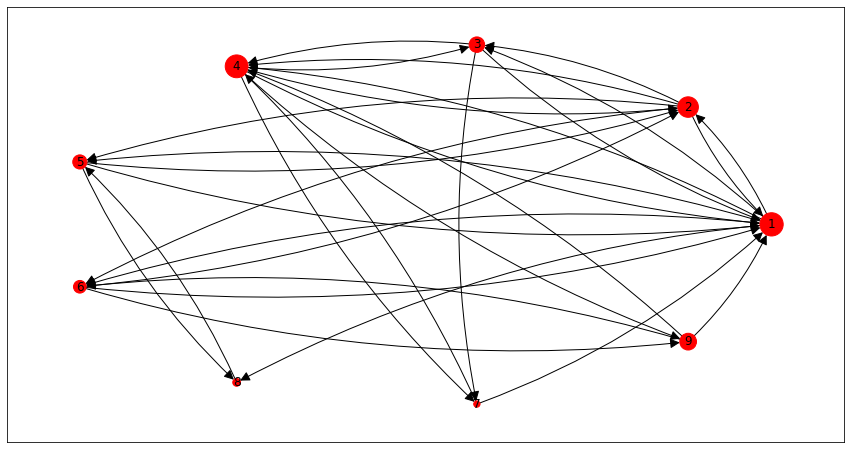

In [41]:
weights = list(nx.get_edge_attributes(G,'weight').values())
fig, ax = plt.subplots(figsize=(15, 8))
nx.draw_networkx(G,node_size=[540,420,240,520,200,160,60,40,280],node_color='red',arrowsize = 20, connectionstyle='arc3, rad = 0.1',pos =nx.circular_layout(G))
plt.show()

In [11]:
diameter = nx.diameter(G)
ellmean = nx.average_shortest_path_length
C = nx.transitivity(G)
degrees = nx.degree(G)
kis = [k for _,k in degrees]
kmax = max(kis)
kstd = np.std(kis)

In [12]:
print(diameter)
print(ellmean)
print(C)
print(degrees)
print(kis)
print(kmax)
print(kstd)

4
<function average_shortest_path_length at 0x7ff2b4986310>
0.4791666666666667
[(1, 13), (2, 9), (3, 6), (4, 10), (5, 6), (6, 6), (8, 3), (7, 4), (9, 5)]
[13, 9, 6, 10, 6, 6, 3, 4, 5]
13
2.997941680718231


In [14]:
def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
    
    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

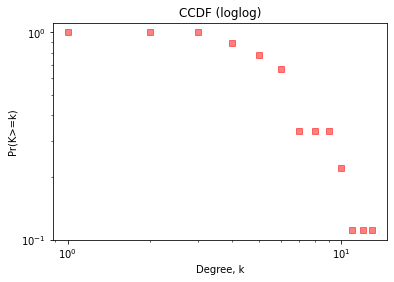

In [17]:
plt.title('CCDF (loglog)')
plot_CCDF(kis)


In [121]:
def plot_2CCDF(kins,kouts):
    # input : two lists of in- and out-degrees
    # output: a plot showing CCDFs of the in- and out-degree distributions Pr(K>=k) for k>=1
    
    kin_max  = max(kins)
    kout_max = max(kouts)

    # histograms
    icounts, ibins = np.histogram(kins, bins=[i for i in range(kin_max+2)], density=True)
    icumcounts = np.cumsum(icounts)
    icumcounts = np.insert(icumcounts,0,0)
    ocounts, obins = np.histogram(kouts, bins=[i for i in range(kout_max+2)], density=True)
    ocumcounts = np.cumsum(ocounts)
    ocumcounts = np.insert(ocumcounts,0,0)

    # plots
    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.loglog(obins[1:-1], 1-ocumcounts[1:-1], 'bo', alpha=0.5, label='out-degree')
    plt.loglog(ibins[1:-1], 1-icumcounts[1:-1], 'rs', alpha=0.5, label='in-degree')
    plt.title('CCDF, in- and out-degrees (loglog)')
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.legend(loc='upper right');
    plt.show()
    return

number of nodes, n  = 9
number of edges, m  = 31

mean(k_in)  =  3.44
mean(k_out) =  3.44

smallest num for 50%  = 3 of 9 nodes


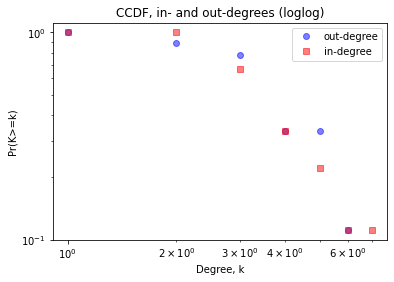

In [122]:
n = G.order()              # number of nodes in my graph
m = G.size()              # number of edges in my graph


degs_in = G.in_degree()
kins = [k for _,k in degs_in]
kin_mean = np.mean(kins)

degs_out = G.out_degree()
kouts = [k for _,k in degs_out]
kout_mean = np.mean(kouts)   # the mean number of out degree

halfm = m//2
kouts.sort(reverse = True)      # sorting the list from greatest to smallest to set up for the for loop

cs_kouts = np.cumsum(kouts)
ind = 0
for kout in cs_kouts:
    if kout < halfm:
        ind = ind + 1
ind = ind + 1


##### do not modify below here #####
print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'\nmean(k_in)  = %5.2f' % kin_mean)
print(f'mean(k_out) = %5.2f' % kout_mean)
print(f'\nsmallest num for 50%  = {ind} of {n} nodes')
plot_2CCDF(kins,kouts)

In [123]:
kins

[7, 4, 3, 5, 3, 3, 2, 2, 2]

In [124]:
kouts

[6, 5, 5, 3, 3, 3, 3, 2, 1]

In [125]:
degs_out

OutDegreeView({1: 6, 2: 5, 3: 3, 4: 5, 5: 3, 6: 3, 8: 1, 7: 2, 9: 3})

In [126]:
degs_in

InDegreeView({1: 7, 2: 4, 3: 3, 4: 5, 5: 3, 6: 3, 8: 2, 7: 2, 9: 2})

In [128]:
spaths = nx.all_pairs_shortest_path(G)
list(spaths)

[(1,
  {1: [1],
   2: [1, 2],
   3: [1, 3],
   4: [1, 4],
   5: [1, 5],
   6: [1, 6],
   8: [1, 8],
   7: [1, 3, 7],
   9: [1, 4, 9]}),
 (2,
  {2: [2],
   1: [2, 1],
   3: [2, 3],
   4: [2, 4],
   5: [2, 5],
   6: [2, 6],
   8: [2, 1, 8],
   7: [2, 3, 7],
   9: [2, 4, 9]}),
 (3,
  {3: [3],
   1: [3, 1],
   4: [3, 4],
   7: [3, 7],
   2: [3, 1, 2],
   5: [3, 1, 5],
   6: [3, 1, 6],
   8: [3, 1, 8],
   9: [3, 4, 9]}),
 (4,
  {4: [4],
   1: [4, 1],
   2: [4, 2],
   3: [4, 3],
   7: [4, 7],
   9: [4, 9],
   5: [4, 1, 5],
   6: [4, 1, 6],
   8: [4, 1, 8]}),
 (5,
  {5: [5],
   1: [5, 1],
   2: [5, 2],
   8: [5, 8],
   3: [5, 1, 3],
   4: [5, 1, 4],
   6: [5, 1, 6],
   7: [5, 1, 3, 7],
   9: [5, 1, 4, 9]}),
 (6,
  {6: [6],
   1: [6, 1],
   2: [6, 2],
   9: [6, 9],
   3: [6, 1, 3],
   4: [6, 1, 4],
   5: [6, 1, 5],
   8: [6, 1, 8],
   7: [6, 1, 3, 7]}),
 (8,
  {8: [8],
   5: [8, 5],
   1: [8, 5, 1],
   2: [8, 5, 2],
   3: [8, 5, 1, 3],
   4: [8, 5, 1, 4],
   6: [8, 5, 1, 6],
   7: [8, 5, 1, 3,